#### Building Multi-Head Self-Attention from Scratch

Multi-Head Attention Output:
 [[-0.99711314 -4.05168043  3.41717945 -1.6218897  -0.80793335  4.51040956
  -4.05505972 -1.72580759]
 [-1.64802039 -3.924873    3.6138476  -1.89197624  0.04426257  3.78999012
  -3.85135212 -2.01034419]
 [-1.07612721 -3.91042033  3.22876866 -1.63193773 -0.48372313  3.7908371
  -3.68506326 -2.07945487]
 [-1.14401077 -3.9259274   3.29862702 -1.68178162 -0.47564813  3.82624654
  -3.74567941 -2.04179223]
 [-0.68965836 -4.0376301   3.18795353 -1.5050135  -0.96745705  4.18547353
  -3.82459544 -1.96431126]
 [-1.21712431 -4.10142387  3.54965473 -1.57698918 -0.39923899  4.60522925
  -3.97986075 -1.9482276 ]]


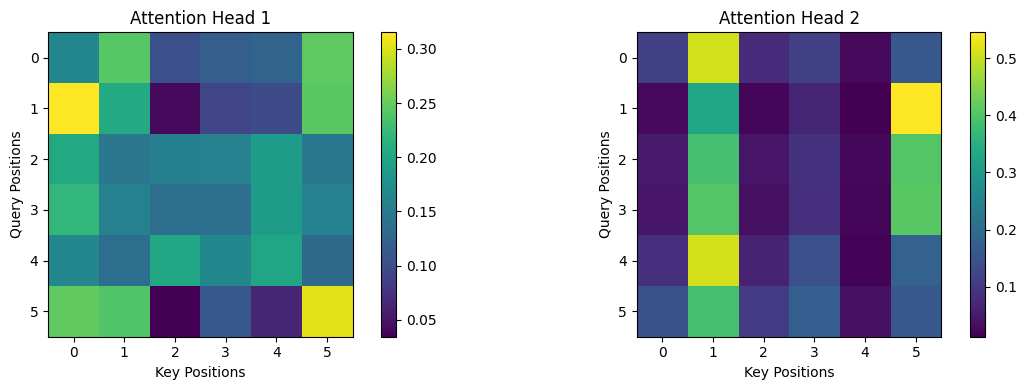

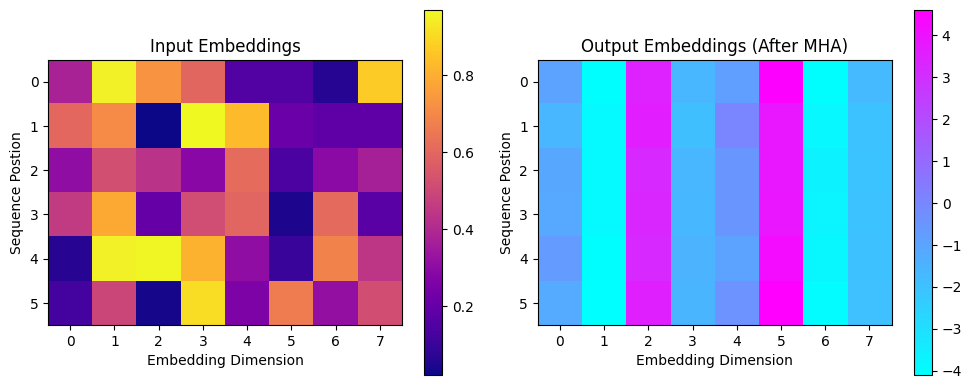

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Utility Functions

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / e_x.sum(axis=-1, keepdims=True)

def scaled_dot_product_attention(Q, K, V):
    d_k = Q.shape[-1]
    scores = np.dot(Q, K.T) / np.sqrt(d_k)
    attention_weights = softmax(scores)
    output = np.dot(attention_weights, V)
    return output, attention_weights

# Multi-Head Self-Attention

class MultiHeadSelfAttention:
    def __init__(self, d_model, num_heads):
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_head = d_model // num_heads
        
        # Weight matrices
        self.W_Q = np.random.randn(d_model, d_model)
        self.W_K = np.random.randn(d_model, d_model)
        self.W_V = np.random.randn(d_model, d_model)
        self.W_O = np.random.randn(d_model, d_model)

    def split_heads(self, X):
        seq_len = X.shape[0]
        return X.reshape(seq_len, self.num_heads, self.d_head).transpose(1, 0, 2)

    def combine_heads(self, X):
        # X shape: (num_heads, seq_len, d_head)
        seq_len = X.shape[1]
        return X.transpose(1, 0, 2).reshape(seq_len, self.d_model)

    def forward(self, X):
        # Linear projections
        Q = X @ self.W_Q
        K = X @ self.W_K
        V = X @ self.W_V

        # split into heads
        Q_heads = self.split_heads(Q)
        K_heads = self.split_heads(K)
        V_heads = self.split_heads(V)

        head_outputs = []
        attention_maps = []

        for i in range(self.num_heads):
            out, attn = scaled_dot_product_attention(Q_heads[i], K_heads[i], V_heads[i])
            head_outputs.append(out)
            attention_maps.append(attn)

        # Combine heads
        combined = self.combine_heads(np.array(head_outputs))
        
        # Final linear projection
        output = combined @ self.W_O
        
        return output, attention_maps

# Example Input

np.random.seed(42)

seq_len = 6
d_model = 8
num_heads = 2

X = np.random.rand(seq_len, d_model)

mha = MultiHeadSelfAttention(d_model, num_heads)
output, attention_maps = mha.forward(X)

print("Multi-Head Attention Output:\n", output)

# Visualization
# 1. Attention per Head

fig, axes = plt.subplots(1, num_heads, figsize=(12, 4))

for i in range(num_heads):
    im = axes[i].imshow(attention_maps[i], cmap="viridis")
    axes[i].set_title(f"Attention Head {i+1}")
    axes[i].set_xlabel("Key Positions")
    axes[i].set_ylabel("Query Positions")
    plt.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.show()

# 2. Input vs Output

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

im0 = axes[0].imshow(X, cmap="plasma")
axes[0].set_title("Input Embeddings")
plt.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(output, cmap="cool")
axes[1].set_title("Output Embeddings (After MHA)")
plt.colorbar(im1, ax=axes[1])

for ax in axes:
    ax.set_xlabel("Embedding Dimension")
    ax.set_ylabel("Sequence Postion")

plt.tight_layout()
plt.show()